In [1]:
import pandas as pd

In [2]:
census = pd.read_csv('pop23_total.csv')
census_ethnicity = pd.read_csv('pop23_ethnicity.csv')

In [3]:
census

,Regional council area,2023,Island
0,Northland region,194007,North Island
1,Auckland region,1656486,North Island
2,Waikato region,498771,North Island
3,Bay of Plenty region,334140,North Island
4,Gisborne region,51135,North Island
5,Hawke's Bay region,175074,North Island
6,Taranaki region,126015,North Island
7,Manawatū-Whanganui region,251412,North Island
8,Wellington region,520971,North Island
9,Tasman region,57807,South Island


In [4]:
census_ethnicity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Regional council area                  16 non-null     object
 1   European                               16 non-null     object
 2   Māori                                  16 non-null     object
 3   Pacific peoples                        16 non-null     object
 4   Asian                                  16 non-null     object
 5   Middle Eastern/Latin American/African  16 non-null     object
 6   Other ethnicity                        16 non-null     object
 7   total                                  16 non-null     object
dtypes: object(8)
memory usage: 1.1+ KB


In [5]:
census_ethnicity["European"] + census_ethnicity["Asian"]

0       141,5949,345
1     825,144518,178
2      357,62460,792
3      240,08729,262
4        28,9051,968
5      128,41511,361
6       105,3667,215
7      196,43119,329
8      378,42979,314
9        52,4162,298
10       44,5444,533
11       42,4502,667
12       29,9641,335
13     522,49886,430
14     205,22420,379
15       84,1957,152
dtype: object

In [6]:
column_headings = census_ethnicity.columns

In [7]:
column_headings

Index(['Regional council area', 'European', 'Māori', 'Pacific peoples',
       'Asian', 'Middle Eastern/Latin American/African', 'Other ethnicity',
       'total'],
      dtype='object')

In [8]:
column_headings_list = census_ethnicity.columns.tolist()

In [9]:
column_headings_list

['Regional council area',
 'European',
 'Māori',
 'Pacific peoples',
 'Asian',
 'Middle Eastern/Latin American/African',
 'Other ethnicity',
 'total']

In [10]:
column_headings_list.remove('Regional council area')

In [11]:
column_headings_list

['European',
 'Māori',
 'Pacific peoples',
 'Asian',
 'Middle Eastern/Latin American/African',
 'Other ethnicity',
 'total']

In [12]:
census_ethnicity[column_headings_list] = census_ethnicity[column_headings_list].replace({',': ''}, regex=True).apply(pd.to_numeric)

print(census_ethnicity)

        Regional council area  European   Māori  Pacific peoples   Asian  \
0            Northland region    141594   72612             9486    9345   
1             Auckland region    825144  203544           275079  518178   
2              Waikato region    357624  125574            26139   60792   
3        Bay of Plenty region    240087  102387            14202   29262   
4             Gisborne region     28905   28029             2841    1968   
5          Hawke's Bay region    128415   50076            10902   11361   
6             Taranaki region    105366   27411             3234    7215   
7   Manawatū-Whanganui region    196431   63177            12522   19329   
8           Wellington region    378429   80613            47349   79314   
9               Tasman region     52416    5745             1509    2298   
10              Nelson region     44544    6252             1485    4533   
11         Marlborough region     42450    7344             1821    2667   
12          

In [13]:
census_ethnicity.describe()

,European,Māori,Pacific peoples,Asian,Middle Eastern/Latin American/African,Other ethnicity,total
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,1.600000e+01
mean,211455.375000,55442.062500,27662.625000,53847.375000,5797.312500,3507.937500,3.120808e+05
std,217699.642115,54208.755998,67128.445528,126905.663117,11006.024512,3811.968424,4.057111e+05
min,28905.000000,4491.000000,540.000000,1335.000000,180.000000,468.000000,3.339000e+04
25%,50448.000000,14472.000000,2586.000000,4066.500000,732.000000,872.250000,5.650125e+04
50%,135004.500000,39052.500000,8880.000000,10353.000000,1330.500000,2163.000000,1.845405e+05
75%,269471.250000,74612.250000,16618.500000,37144.500000,5694.750000,4104.000000,3.752978e+05
max,825144.000000,203544.000000,275079.000000,518178.000000,44718.000000,15144.000000,1.656486e+06


In [14]:
census_ethnicity['European'].sum(axis=0)

3383286

In [15]:
pop23 = pd.merge(census_ethnicity, census, on='Regional council area')
print(pop23.head())

  Regional council area  European   Māori  Pacific peoples   Asian  \
0      Northland region    141594   72612             9486    9345   
1       Auckland region    825144  203544           275079  518178   
2        Waikato region    357624  125574            26139   60792   
3  Bay of Plenty region    240087  102387            14202   29262   
4       Gisborne region     28905   28029             2841    1968   

   Middle Eastern/Latin American/African  Other ethnicity    total     2023  \
0                                   1263             2208   194007   194007   
1                                  44718            15144  1656486  1656486   
2                                   7146             5742   498771   498771   
3                                   3954             3558   334140   334140   
4                                    381              468    51135    51135   

         Island  
0  North Island  
1  North Island  
2  North Island  
3  North Island  
4  North Islan

In [16]:
pop23

,Regional council area,European,Māori,Pacific peoples,Asian,Middle Eastern/Latin American/African,Other ethnicity,total,2023,Island
0,Northland region,141594,72612,9486,9345,1263,2208,194007,194007,North Island
1,Auckland region,825144,203544,275079,518178,44718,15144,1656486,1656486,North Island
2,Waikato region,357624,125574,26139,60792,7146,5742,498771,498771,North Island
3,Bay of Plenty region,240087,102387,14202,29262,3954,3558,334140,334140,North Island
4,Gisborne region,28905,28029,2841,1968,381,468,51135,51135,North Island
5,Hawke's Bay region,128415,50076,10902,11361,1398,2118,175074,175074,North Island
6,Taranaki region,105366,27411,3234,7215,978,1719,126015,126015,North Island
7,Manawatū-Whanganui region,196431,63177,12522,19329,2394,3339,251412,251412,North Island
8,Wellington region,378429,80613,47349,79314,11934,5823,520971,520971,North Island
9,Tasman region,52416,5745,1509,2298,435,915,57807,57807,South Island


In [17]:
grouped_by_island = pop23.groupby('Island')
print(grouped_by_island.sum())

                                          Regional council area  European  \
Island                                                                      
North Island  Northland regionAuckland regionWaikato regionB...   2401995   
South Island  Tasman regionNelson regionMarlborough regionWe...    981291   

               Māori  Pacific peoples   Asian  \
Island                                          
North Island  753423           401754  736764   
South Island  133650            40848  124794   

              Middle Eastern/Latin American/African  Other ethnicity    total  \
Island                                                                          
North Island                                  74166            40119  3808011   
South Island                                  18591            16008  1185282   

                 2023  
Island                 
North Island  3808011  
South Island  1185282  


In [18]:
grouped_by_island = pop23.groupby('Island')[['European', 'Māori', 'Pacific peoples', 'Asian', 
                                                   'Middle Eastern/Latin American/African', 'Other ethnicity']].sum()


In [19]:
grouped_by_island

,European,Māori,Pacific peoples,Asian,Middle Eastern/Latin American/African,Other ethnicity
Island,,,,,,
North Island,2401995,753423,401754,736764,74166,40119
South Island,981291,133650,40848,124794,18591,16008


In [20]:
import matplotlib.pyplot as plt

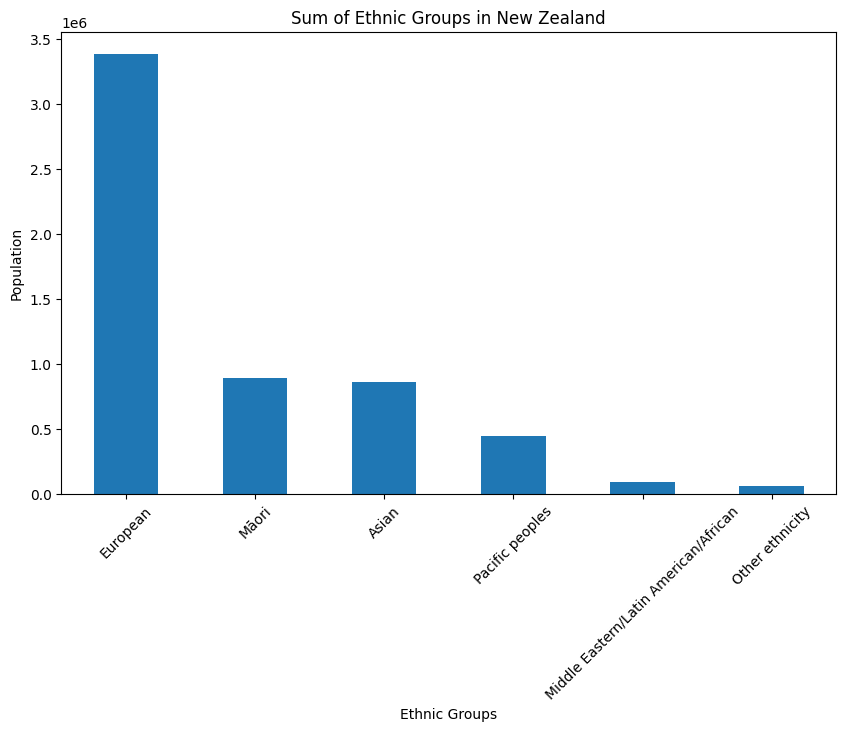

In [28]:
ethnic_group_sums = pop23[['European', 'Māori', 'Pacific peoples', 'Asian', 
                                 'Middle Eastern/Latin American/African', 'Other ethnicity']].sum()

# Sort the sums in descending order
sorted_ethnic_group_sums = ethnic_group_sums.sort_values(ascending=False)

# Plotting the sum of each ethnic group
sorted_ethnic_group_sums.plot(kind='bar', figsize=(10, 6), title='Sum of Ethnic Groups in New Zealand')
plt.xlabel('Ethnic Groups')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Group by Island and sum the ethnic groups
grouped_by_island = pop23.groupby('Island')[['European', 'Māori', 'Pacific peoples', 'Asian', 
                                                   'Middle Eastern/Latin American/African', 'Other ethnicity']].sum()


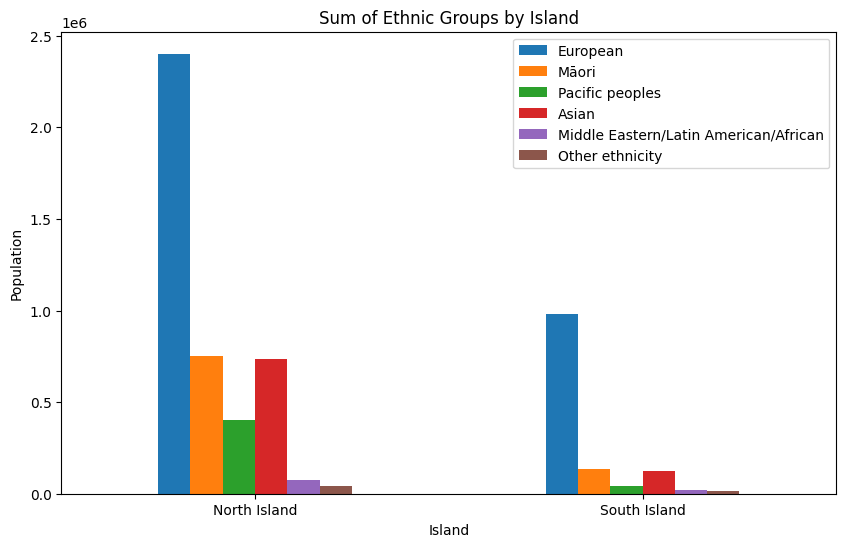

In [33]:
# Add a total population column
grouped_by_island['Total Population'] = grouped_by_island.sum(axis=1)

# Sort by the total population column
grouped_by_island_sorted = grouped_by_island.sort_values(by='Total Population', ascending=False)

# Drop the total population column before plotting
grouped_by_island_sorted.drop(columns='Total Population', inplace=True)

# Plotting the sum of ethnic groups by island
ax = grouped_by_island_sorted.plot(kind='bar', stacked=False, figsize=(10, 6), title='Sum of Ethnic Groups by Island')
plt.xlabel('Island')
plt.ylabel('Population')
plt.xticks(rotation=0)
plt.show()

In [24]:
grouped_by_island_percentage = grouped_by_island.div(grouped_by_island.sum(axis=1), axis=0) * 100


In [25]:
grouped_by_island_percentage

,European,Māori,Pacific peoples,Asian,Middle Eastern/Latin American/African,Other ethnicity
Island,,,,,,
North Island,54.488988,17.091316,9.113745,16.713409,1.682447,0.910095
South Island,74.612563,10.162092,3.105882,9.488725,1.413569,1.217170


In [26]:
# Convert to longer format
grouped_by_island_percentage_long = grouped_by_island_percentage.reset_index().melt(id_vars='Island', var_name='Ethnic Group', value_name='Percentage')
print(grouped_by_island_percentage_long)

          Island                           Ethnic Group  Percentage
0   North Island                               European   54.488988
1   South Island                               European   74.612563
2   North Island                                  Māori   17.091316
3   South Island                                  Māori   10.162092
4   North Island                        Pacific peoples    9.113745
5   South Island                        Pacific peoples    3.105882
6   North Island                                  Asian   16.713409
7   South Island                                  Asian    9.488725
8   North Island  Middle Eastern/Latin American/African    1.682447
9   South Island  Middle Eastern/Latin American/African    1.413569
10  North Island                        Other ethnicity    0.910095
11  South Island                        Other ethnicity    1.217170


NameError: name 'ax' is not defined

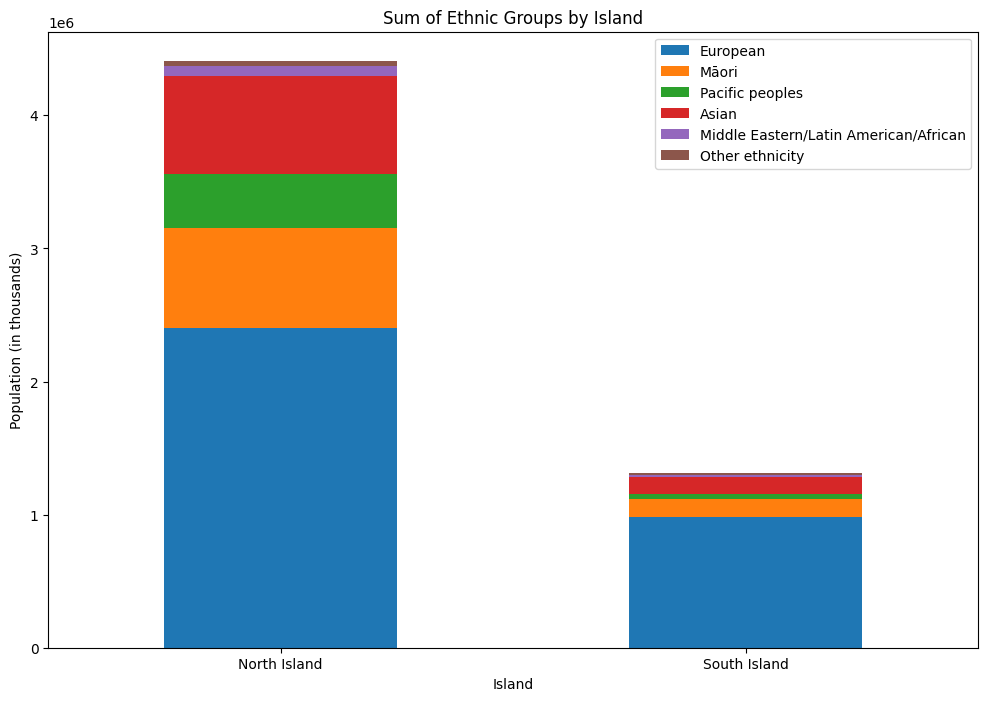

In [27]:
# Plotting the sum of ethnic groups by island
pop_plot = grouped_by_island.plot(kind='bar', stacked=True, figsize=(12, 8), title='Sum of Ethnic Groups by Island')
plt.xlabel('Island')
plt.ylabel('Population (in thousands)')
plt.xticks(rotation=0)

# Change y-axis to thousands
pop_plot.set_yticklabels(['{:,}'.format(int(x/1000)) + 'k' for x in ax.get_yticks()])


plt.show()